In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as sts
from scipy.stats import linregress

In [2]:
df = pd.read_csv("data/video-game-sales.csv")
df.head()

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
df.describe()

Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.406443      0.264667      0.146652      0.077782   
std     4791.853933      5.828981      0.816683      0.505351      0.309291   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4151.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8300.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12449.750000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16598.000000  16598.000000  
mean       0.048063      0.537441  
std        0.188588      1.555028  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.470000  
max       10.570000     82.740000

In [5]:
# Select list of top 100 games
top_games_df = df.loc[df["Rank"] < 101, :]
top_games_df 

Rank                                    Name Platform    Year  \
0      1                              Wii Sports      Wii  2006.0   
1      2                       Super Mario Bros.      NES  1985.0   
2      3                          Mario Kart Wii      Wii  2008.0   
3      4                       Wii Sports Resort      Wii  2009.0   
4      5                Pokemon Red/Pokemon Blue       GB  1996.0   
..   ...                                     ...      ...     ...   
95    96  Crash Bandicoot 2: Cortex Strikes Back       PS  1997.0   
96    97                     Super Mario Bros. 2      NES  1988.0   
97    98     Super Smash Bros. for Wii U and 3DS      3DS  2014.0   
98    99              Call of Duty: World at War     X360  2008.0   
99   100                           Battlefield 3     X360  2011.0   

           Genre                    Publisher  NA_Sales  EU_Sales  JP_Sales  \
0         Sports                     Nintendo     41.49     29.02      3.77   
1       Platform                     Nintendo     29.08      3.58      6.81   
2         Racing                     Nintendo     15.85     12.88      3.79   
3         Sports                     Nintendo     15.75     11.01      3.28   
4   Role-Playing                     Nintendo     11.27      8.89     10.22   
..           ...                          ...       ...       ...       ...   
95      Platform  Sony Computer Entertainment      3.78      2.17      1.31   
96      Platform                     Nintendo      5.39      1.18      0.70   
97      Fighting                     Nintendo      3.24      1.35      2.42   
98       Shooter                   Activision      4.79      1.90      0.00   
99       Shooter              Electronic Arts      4.46      2.13      0.06   

    Other_Sales  Global_Sales  
0          8.46         82.74  
1          0.77         40.24  
2          3.31         35.82  
3          2.96         33.00  
4          1.00         31.37  
..          ...           ...  
95         0.31          7.58  
96         0.19          7.46  
97         0.43          7.45  
98         0.69          7.37  
99         0.69          7.34  

[100 rows x 11 columns]

In [6]:
top_games_df.describe()

Rank         Year    NA_Sales    EU_Sales    JP_Sales  \
count  100.000000   100.000000  100.000000  100.000000  100.000000   
mean    50.500000  2005.060000    7.049900    4.206600    2.046200   
std     29.011492     7.842928    5.873226    3.511557    2.048607   
min      1.000000  1982.000000    0.980000    0.010000    0.000000   
25%     25.750000  2001.000000    3.862500    2.315000    0.235000   
50%     50.500000  2007.000000    5.675000    3.385000    1.635000   
75%     75.250000  2011.000000    8.290000    5.042500    3.280000   
max    100.000000  2015.000000   41.490000   29.020000   10.220000   

       Other_Sales  Global_Sales  
count   100.000000    100.000000  
mean      1.317700     14.619800  
std       1.559055      9.936065  
min       0.080000      7.340000  
25%       0.550000      8.975000  
50%       0.865000     11.255000  
75%       1.620000     15.925000  
max      10.570000     82.740000

In [7]:
genre_df = top_games_df['Genre'].value_counts()
genre_df

Shooter         22
Platform        16
Role-Playing    15
Action          12
Racing          10
Misc             9
Sports           6
Simulation       4
Puzzle           3
Fighting         2
Adventure        1
Name: Genre, dtype: int64

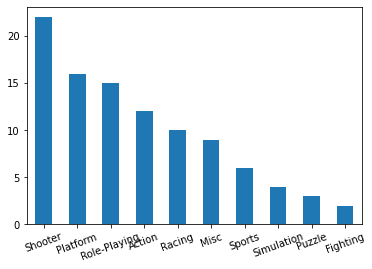

In [8]:
genre_df.head(10).plot.bar(x='Genre', rot=20)

In [9]:
platforms_df = top_games_df['Platform'].value_counts()
platforms_df

X360    16
Wii     15
DS      13
PS3      9
3DS      7
PS2      6
GB       6
PS4      5
PS       5
SNES     4
N64      4
NES      4
GBA      2
XB       1
PC       1
PSP      1
2600     1
Name: Platform, dtype: int64

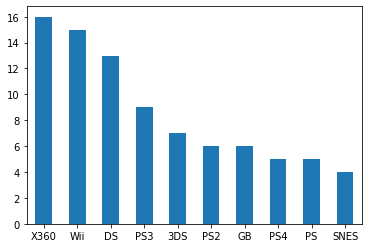

In [10]:
platforms_df.head(10).plot.bar(x='Platform', rot=0)

In [11]:
publisher_df = top_games_df['Publisher'].value_counts()

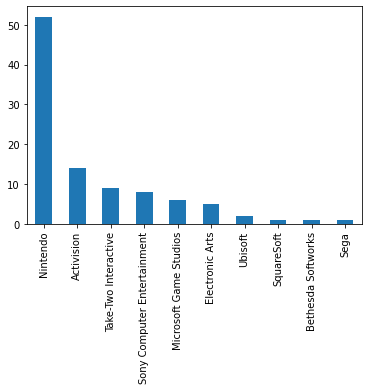

In [12]:
publisher_df.head(10).plot.bar(x='Platform', rot=90)

In [13]:
# Top XBOX 360 Games
X360_df = top_games_df.loc[top_games_df["Platform"] == "X360", :]
X360_df.head()

Rank                            Name Platform    Year    Genre  \
15    16              Kinect Adventures!     X360  2010.0     Misc   
23    24              Grand Theft Auto V     X360  2013.0   Action   
29    30  Call of Duty: Modern Warfare 3     X360  2011.0  Shooter   
31    32         Call of Duty: Black Ops     X360  2010.0  Shooter   
35    36      Call of Duty: Black Ops II     X360  2012.0  Shooter   

                 Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
15  Microsoft Game Studios     14.97      4.94      0.24         1.67   
23    Take-Two Interactive      9.63      5.31      0.06         1.38   
29              Activision      9.03      4.28      0.13         1.32   
31              Activision      9.67      3.73      0.11         1.13   
35              Activision      8.25      4.30      0.07         1.12   

    Global_Sales  
15         21.82  
23         16.38  
29         14.76  
31         14.64  
35         13.73

In [14]:
# Top Wii games
Wii_df = top_games_df.loc[top_games_df["Platform"] == "Wii", :]
Wii_df.head()

Rank                       Name Platform    Year     Genre Publisher  \
0     1                 Wii Sports      Wii  2006.0    Sports  Nintendo   
2     3             Mario Kart Wii      Wii  2008.0    Racing  Nintendo   
3     4          Wii Sports Resort      Wii  2009.0    Sports  Nintendo   
7     8                   Wii Play      Wii  2006.0      Misc  Nintendo   
8     9  New Super Mario Bros. Wii      Wii  2009.0  Platform  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
7     14.03      9.20      2.93         2.85         29.02  
8     14.59      7.06      4.70         2.26         28.62

In [15]:
# Top DS games
DS_df = top_games_df.loc[top_games_df["Platform"] == "DS", :]
DS_df.head()

Rank                                          Name Platform    Year  \
6      7                         New Super Mario Bros.       DS  2006.0   
10    11                                    Nintendogs       DS  2005.0   
11    12                                 Mario Kart DS       DS  2005.0   
19    20  Brain Age: Train Your Brain in Minutes a Day       DS  2005.0   
20    21                 Pokemon Diamond/Pokemon Pearl       DS  2006.0   

           Genre Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
6       Platform  Nintendo     11.38      9.23      6.50         2.90   
10    Simulation  Nintendo      9.07     11.00      1.93         2.75   
11        Racing  Nintendo      9.81      7.57      4.13         1.92   
19          Misc  Nintendo      4.75      9.26      4.16         2.05   
20  Role-Playing  Nintendo      6.42      4.52      6.04         1.37   

    Global_Sales  
6          30.01  
10         24.76  
11         23.42  
19         20.22  
20         18.36

In [16]:
# Top PS3 games
PS3_df = top_games_df.loc[top_games_df["Platform"] == "PS3", :]
PS3_df.head()

Rank                            Name Platform    Year    Genre  \
16    17              Grand Theft Auto V      PS3  2013.0   Action   
34    35      Call of Duty: Black Ops II      PS3  2012.0  Shooter   
37    38  Call of Duty: Modern Warfare 3      PS3  2011.0  Shooter   
40    41         Call of Duty: Black Ops      PS3  2010.0  Shooter   
54    55                  Gran Turismo 5      PS3  2010.0   Racing   

                      Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
16         Take-Two Interactive      7.01      9.27      0.97         4.14   
34                   Activision      4.99      5.88      0.65         2.52   
37                   Activision      5.54      5.82      0.49         1.62   
40                   Activision      5.98      4.44      0.48         1.83   
54  Sony Computer Entertainment      2.96      4.88      0.81         2.12   

    Global_Sales  
16         21.40  
34         14.03  
37         13.46  
40         12.73  
54         10.77

In [17]:
# Top global sales
top_games_df.sort_values(by=['Global_Sales'], ascending=False).head(20)

Rank                                          Name Platform    Year  \
0      1                                    Wii Sports      Wii  2006.0   
1      2                             Super Mario Bros.      NES  1985.0   
2      3                                Mario Kart Wii      Wii  2008.0   
3      4                             Wii Sports Resort      Wii  2009.0   
4      5                      Pokemon Red/Pokemon Blue       GB  1996.0   
5      6                                        Tetris       GB  1989.0   
6      7                         New Super Mario Bros.       DS  2006.0   
7      8                                      Wii Play      Wii  2006.0   
8      9                     New Super Mario Bros. Wii      Wii  2009.0   
9     10                                     Duck Hunt      NES  1984.0   
10    11                                    Nintendogs       DS  2005.0   
11    12                                 Mario Kart DS       DS  2005.0   
12    13                   Pokemon Gold/Pokemon Silver       GB  1999.0   
13    14                                       Wii Fit      Wii  2007.0   
14    15                                  Wii Fit Plus      Wii  2009.0   
15    16                            Kinect Adventures!     X360  2010.0   
16    17                            Grand Theft Auto V      PS3  2013.0   
17    18                 Grand Theft Auto: San Andreas      PS2  2004.0   
18    19                             Super Mario World     SNES  1990.0   
19    20  Brain Age: Train Your Brain in Minutes a Day       DS  2005.0   

           Genre               Publisher  NA_Sales  EU_Sales  JP_Sales  \
0         Sports                Nintendo     41.49     29.02      3.77   
1       Platform                Nintendo     29.08      3.58      6.81   
2         Racing                Nintendo     15.85     12.88      3.79   
3         Sports                Nintendo     15.75     11.01      3.28   
4   Role-Playing                Nintendo     11.27      8.89     10.22   
5         Puzzle                Nintendo     23.20      2.26      4.22   
6       Platform                Nintendo     11.38      9.23      6.50   
7           Misc                Nintendo     14.03      9.20      2.93   
8       Platform                Nintendo     14.59      7.06      4.70   
9        Shooter                Nintendo     26.93      0.63      0.28   
10    Simulation                Nintendo      9.07     11.00      1.93   
11        Racing                Nintendo      9.81      7.57      4.13   
12  Role-Playing                Nintendo      9.00      6.18      7.20   
13        Sports                Nintendo      8.94      8.03      3.60   
14        Sports                Nintendo      9.09      8.59      2.53   
15          Misc  Microsoft Game Studios     14.97      4.94      0.24   
16        Action    Take-Two Interactive      7.01      9.27      0.97   
17        Action    Take-Two Interactive      9.43      0.40      0.41   
18      Platform                Nintendo     12.78      3.75      3.54   
19          Misc                Nintendo      4.75      9.26      4.16   

    Other_Sales  Global_Sales  
0          8.46         82.74  
1          0.77         40.24  
2          3.31         35.82  
3          2.96         33.00  
4          1.00         31.37  
5          0.58         30.26  
6          2.90         30.01  
7          2.85         29.02  
8          2.26         28.62  
9          0.47         28.31  
10         2.75         24.76  
11         1.92         23.42  
12         0.71         23.10  
13         2.15         22.72  
14         1.79         22.00  
15         1.67         21.82  
16         4.14         21.40  
17        10.57         20.81  
18         0.55         20.61  
19         2.05         20.22

In [18]:
# Top North American sales
top_games_df.sort_values(by=['NA_Sales'], ascending=False).head(20)

Rank                           Name Platform    Year         Genre  \
0      1                     Wii Sports      Wii  2006.0        Sports   
1      2              Super Mario Bros.      NES  1985.0      Platform   
9     10                      Duck Hunt      NES  1984.0       Shooter   
5      6                         Tetris       GB  1989.0        Puzzle   
2      3                 Mario Kart Wii      Wii  2008.0        Racing   
3      4              Wii Sports Resort      Wii  2009.0        Sports   
15    16             Kinect Adventures!     X360  2010.0          Misc   
8      9      New Super Mario Bros. Wii      Wii  2009.0      Platform   
7      8                       Wii Play      Wii  2006.0          Misc   
18    19              Super Mario World     SNES  1990.0      Platform   
6      7          New Super Mario Bros.       DS  2006.0      Platform   
4      5       Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing   
21    22               Super Mario Land       GB  1989.0      Platform   
11    12                  Mario Kart DS       DS  2005.0        Racing   
31    32        Call of Duty: Black Ops     X360  2010.0       Shooter   
23    24             Grand Theft Auto V     X360  2013.0        Action   
22    23            Super Mario Bros. 3      NES  1988.0      Platform   
17    18  Grand Theft Auto: San Andreas      PS2  2004.0        Action   
14    15                   Wii Fit Plus      Wii  2009.0        Sports   
10    11                     Nintendogs       DS  2005.0    Simulation   

                 Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0                 Nintendo     41.49     29.02      3.77         8.46   
1                 Nintendo     29.08      3.58      6.81         0.77   
9                 Nintendo     26.93      0.63      0.28         0.47   
5                 Nintendo     23.20      2.26      4.22         0.58   
2                 Nintendo     15.85     12.88      3.79         3.31   
3                 Nintendo     15.75     11.01      3.28         2.96   
15  Microsoft Game Studios     14.97      4.94      0.24         1.67   
8                 Nintendo     14.59      7.06      4.70         2.26   
7                 Nintendo     14.03      9.20      2.93         2.85   
18                Nintendo     12.78      3.75      3.54         0.55   
6                 Nintendo     11.38      9.23      6.50         2.90   
4                 Nintendo     11.27      8.89     10.22         1.00   
21                Nintendo     10.83      2.71      4.18         0.42   
11                Nintendo      9.81      7.57      4.13         1.92   
31              Activision      9.67      3.73      0.11         1.13   
23    Take-Two Interactive      9.63      5.31      0.06         1.38   
22                Nintendo      9.54      3.44      3.84         0.46   
17    Take-Two Interactive      9.43      0.40      0.41        10.57   
14                Nintendo      9.09      8.59      2.53         1.79   
10                Nintendo      9.07     11.00      1.93         2.75   

    Global_Sales  
0          82.74  
1          40.24  
9          28.31  
5          30.26  
2          35.82  
3          33.00  
15         21.82  
8          28.62  
7          29.02  
18         20.61  
6          30.01  
4          31.37  
21         18.14  
11         23.42  
31         14.64  
23         16.38  
22         17.28  
17         20.81  
14         22.00  
10         24.76

The correlation between both factors is 0.9


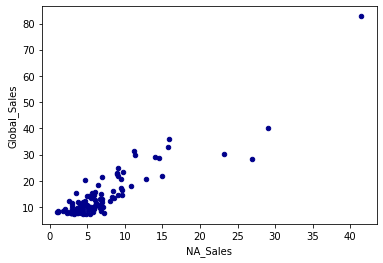

In [19]:
ax1 = top_games_df.plot.scatter(x='NA_Sales',
                      y='Global_Sales',
                      c='DarkBlue')

x = top_games_df.iloc[:,6]
y = top_games_df.iloc[:,10]
correlation = sts.pearsonr(x, y)
print(f"The correlation between both factors is {round(correlation[0],2)}")

In [20]:
top_games_df.set_index('Name', inplace=True)
top_games_df

Rank Platform    Year         Genre  \
Name                                                                          
Wii Sports                                 1      Wii  2006.0        Sports   
Super Mario Bros.                          2      NES  1985.0      Platform   
Mario Kart Wii                             3      Wii  2008.0        Racing   
Wii Sports Resort                          4      Wii  2009.0        Sports   
Pokemon Red/Pokemon Blue                   5       GB  1996.0  Role-Playing   
...                                      ...      ...     ...           ...   
Crash Bandicoot 2: Cortex Strikes Back    96       PS  1997.0      Platform   
Super Mario Bros. 2                       97      NES  1988.0      Platform   
Super Smash Bros. for Wii U and 3DS       98      3DS  2014.0      Fighting   
Call of Duty: World at War                99     X360  2008.0       Shooter   
Battlefield 3                            100     X360  2011.0       Shooter   

                                                          Publisher  NA_Sales  \
Name                                                                            
Wii Sports                                                 Nintendo     41.49   
Super Mario Bros.                                          Nintendo     29.08   
Mario Kart Wii                                             Nintendo     15.85   
Wii Sports Resort                                          Nintendo     15.75   
Pokemon Red/Pokemon Blue                                   Nintendo     11.27   
...                                                             ...       ...   
Crash Bandicoot 2: Cortex Strikes Back  Sony Computer Entertainment      3.78   
Super Mario Bros. 2                                        Nintendo      5.39   
Super Smash Bros. for Wii U and 3DS                        Nintendo      3.24   
Call of Duty: World at War                               Activision      4.79   
Battlefield 3                                       Electronic Arts      4.46   

                                        EU_Sales  JP_Sales  Other_Sales  \
Name                                                                      
Wii Sports                                 29.02      3.77         8.46   
Super Mario Bros.                           3.58      6.81         0.77   
Mario Kart Wii                             12.88      3.79         3.31   
Wii Sports Resort                          11.01      3.28         2.96   
Pokemon Red/Pokemon Blue                    8.89     10.22         1.00   
...                                          ...       ...          ...   
Crash Bandicoot 2: Cortex Strikes Back      2.17      1.31         0.31   
Super Mario Bros. 2                         1.18      0.70         0.19   
Super Smash Bros. for Wii U and 3DS         1.35      2.42         0.43   
Call of Duty: World at War                  1.90      0.00         0.69   
Battlefield 3                               2.13      0.06         0.69   

                                        Global_Sales  
Name                                                  
Wii Sports                                     82.74  
Super Mario Bros.                              40.24  
Mario Kart Wii                                 35.82  
Wii Sports Resort                              33.00  
Pokemon Red/Pokemon Blue                       31.37  
...                                              ...  
Crash Bandicoot 2: Cortex Strikes Back          7.58  
Super Mario Bros. 2                             7.46  
Super Smash Bros. for Wii U and 3DS             7.45  
Call of Duty: World at War                      7.37  
Battlefield 3                                   7.34  

[100 rows x 10 columns]

In [27]:
html_table = top_games_df.to_html()

In [28]:
html_table.replace('\n', '')

'<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>Rank</th>      <th>Platform</th>      <th>Year</th>      <th>Genre</th>      <th>Publisher</th>      <th>NA_Sales</th>      <th>EU_Sales</th>      <th>JP_Sales</th>      <th>Other_Sales</th>      <th>Global_Sales</th>    </tr>    <tr>      <th>Name</th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>    </tr>  </thead>  <tbody>    <tr>      <th>Wii Sports</th>      <td>1</td>      <td>Wii</td>      <td>2006.0</td>      <td>Sports</td>      <td>Nintendo</td>      <td>41.49</td>      <td>29.02</td>      <td>3.77</td>      <td>8.46</td>      <td>82.74</td>    </tr>    <tr>      <th>Super Mario Bros.</th>      <td>2</td>      <td>NES</td>      <td>1985.0</td>      <td>Platform</td>      <td>Nintendo</td>      <td>29.08</td>      <td>3.58</td>      <td>6.81</td>      <td>0.77</td>      

In [24]:
top_games_df.to_html('video-games-table.html')